<a href="https://colab.research.google.com/github/mdcodigo/coder_ds/blob/main/Visualizacion_Duva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Cargamos data set de HR

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_hr= pd.read_csv("https://github.com/mdcodigo/coder_ds/raw/main/data-sources/HRDataset_v14.csv")

Histograma de Salarios

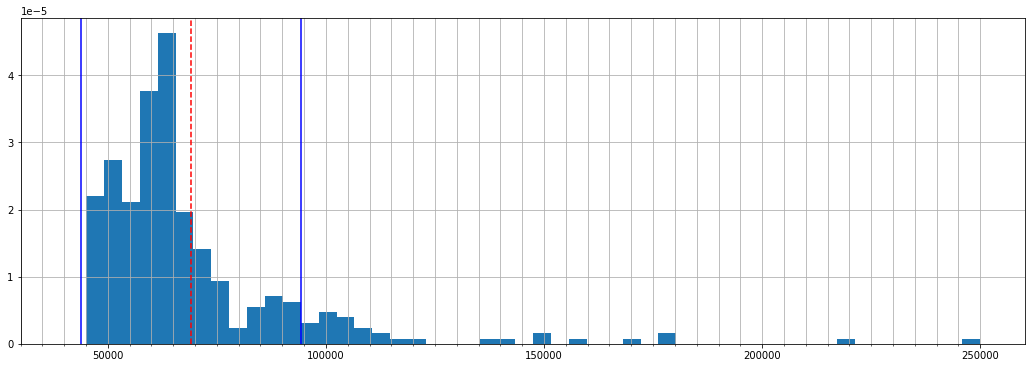

In [72]:
SALARY_COL = "Salary"
fig, ax = plt.subplots(figsize=(18,6))

salary_mean=df_hr[SALARY_COL].mean()
salary_std=df_hr[SALARY_COL].std()

n, bins, patches = ax.hist(
    df_hr[SALARY_COL], 
    #bins = [1000,2000,4000,8000,16000,32000,64000,128000,256000],
    bins = 50,
    density=True)

#ax.set_xlim(df_hr["Salary"].min()/2,df_hr["Salary"].max()*1.1)
#ax.set_xticks([16000,32000,64000,128000,256000])
#ax.set_xticks(np.arange(22000,df_hr["Salary"].max()*1.1,step=10000))
ax.set_xticks(
    ticks=np.arange(30000,df_hr[SALARY_COL].max(),step=5000),
    minor=True)

ax.axvline(x=salary_mean, c = "red", linestyle = "--")


ax.axvline(x = salary_mean + salary_std, c= "blue")
ax.axvline(x = salary_mean - salary_std, c= "blue")

plt.grid(which="both",axis="both")

#print(bins)
#print(n)
plt.show()

1. A "ojimetro" ;) se puede apreciar que el 68% de los salarios estan en el rango de 45.000 a 95.000
2. Notas: Las líneas azules son la media menos y mas la dev. estandar


Diagrama de vilolin por genero.
Para sumarle un extra discrimine por estado civil

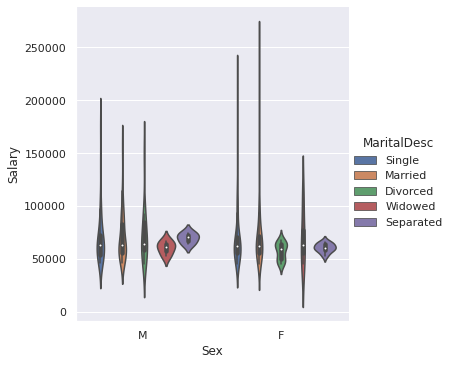

In [94]:
SALARY_COL = "Salary"
GEMDER_COL = "sex"
#fig, ax = plt.subplots(figsize=(18,6))

salary_mean=df_hr[SALARY_COL].mean()
salary_std=df_hr[SALARY_COL].std()
fs = df_hr.loc[df_hr.Sex == "F"]
ms = df_hr.loc[df_hr.Sex == "M"]

sns.set()

ax = sns.catplot(
    data=df_hr,
    kind="violin",
    x="Sex",
    y="Salary",
    hue="MaritalDesc")



Serie de tiempo en base a DateOfHire

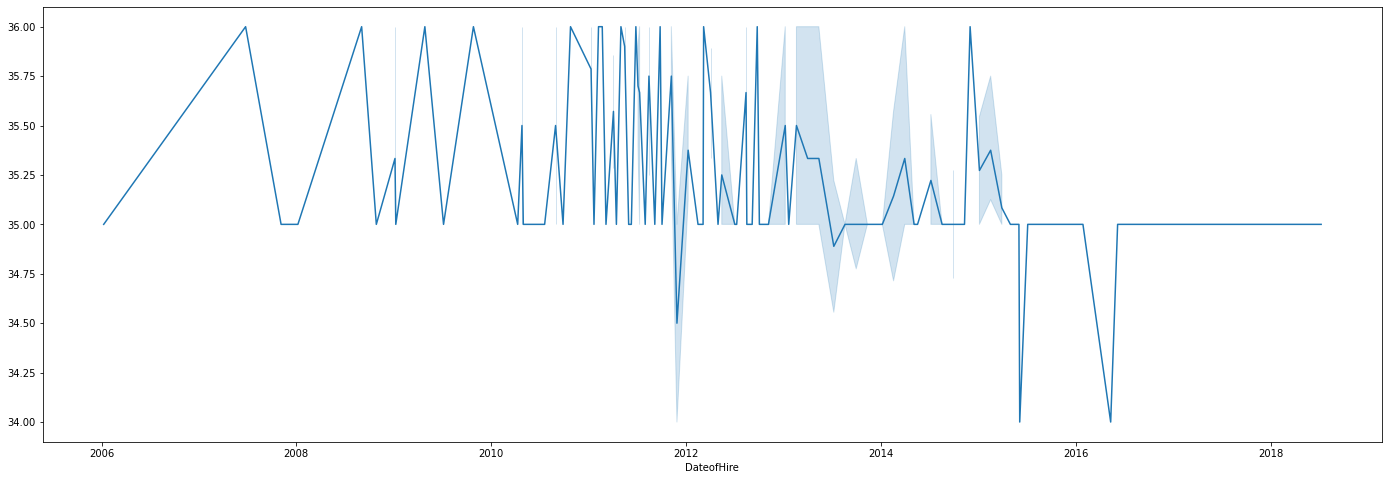

In [6]:
df_hr2= pd.read_csv("https://github.com/mdcodigo/coder_ds/raw/main/data-sources/HRDataset_v14.csv")

df_hr2.index = pd.to_datetime(df_hr2["DateofHire"])

fig, ax = plt.subplots(figsize=(24,8))

sns.lineplot(x=df_hr2.index,y=df_hr2.count(1),ax=ax)